<a href="https://colab.research.google.com/github/BryanGA10/statistical-analysis-project/blob/master/Statistical_analysis_project_BGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerias

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
%matplotlib inline
pd.set_option('display.max_columns', 100)

##Conexión Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Funciones

In [8]:
def dropna_by_column(column_name, data_frame):

  """
  This function receives a list of column names and DataFrame, 
  eliminate the columns and return a summary
  with the new percentage of null values by column.

  Return
    Percentage of null values by column 
  """
  
  for i in column_name:
    data_frame.drop(f'{i}', axis= 1, inplace=True)
    null_porcentaje = data_frame.isnull().mean()*100
  
  return null_porcentaje.sort_values(ascending = False).head(20)

In [9]:
def dropna_reg_by_column(column_name, data_frame):

  """
  This function receives a list of column names and DataFrame, 
  eliminate the NA rows in the column and return a summary
  with the new percentage of null values by column.

  Return
    Percentage of null values by column 
  """
  
  for i in column_name:
    data_frame.dropna(subset=[i], inplace=True)
  
  return data_frame.isnull().mean()*100

In [10]:
def one_hot_encoder (columnas, dataframe):

  """ 
  This function receives a list of columns to be trnasformed by one hot encoded method,
  and merged to the given Dataframe.

  Return 
    DataFrame with new numeric columns
  """

  for element in columnas:
    df1 = pd.get_dummies(dataframe[element])
    dataframe = pd.concat([dataframe,df1], axis=1).reindex(dataframe.index)

  return dataframe

In [11]:
def ols_model (columnas,dataframe,var_a_predecir):

  """
  This function receives a list of columns, one dataframe, and a variable to be predicted by 
  ordinary least squares (OLS) method.

  Return 
    OLS summary and DataFrame with real vs. predicted values
  """
  from scipy.stats import linregress
  from statsmodels.formula.api import ols

  X = sm.add_constant(dataframe[columnas])
  y = dataframe[var_a_predecir]

  linereg_statsm = sm.OLS(y, X).fit()

  print(linereg_statsm.summary())

  X['Predicciones'] = linereg_statsm.predict(X)
  X['Real'] = y
  X

  return X

##Exploración

In [12]:
df = pd.read_csv('/content/drive/MyDrive/bootcamp/statistical-analysis-project/train.csv')

In [13]:
len(df.columns), df.shape

(81, (1460, 81))

In [14]:
df.columns,df.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Realizamos la revisión general de las variables y tipos de datos**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###Pre-procesamiento

####Variables categóricas a numéricas

**Despues de revisar detalladamente las variables categóricas he elegido las siguientes para ser transformadas a numéricas a través de la técnica de one hot encoder:** 

* **SaleCondition**: Condition of sale - esta variable fue elegida bajo el supuesto de que la condición de venta puede ser deteminante en el precio de venta.
* **Neighborhood**: Physical locations within Ames city limits - esta variable fue elegida ya que la locación del inmueble puede determinar el precio de la propiedad.


In [29]:
df = one_hot_encoder(['SaleCondition','Neighborhood'],df)

####Separación de variables numéricas y limpieza de registros nulos 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, Id to Veenker
dtypes: float64(3), int64(35), object(43), uint8(31)
memory usage: 968.2+ KB


In [31]:
df = df._get_numeric_data()
df.columns, df.shape

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Abnorml', 'AdjLand',
        'Alloca', 'Family', 'Normal', 'Partial', 'Blmngtn', 'Blueste', 'BrDale',
        'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert',
        'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
        'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
        'StoneBr', 'Timber', 'Veenker'],
       dtype='object'), (1460, 69))

**Obtendremos el porcentaje de nulos por columna**

In [32]:
null_porcentaje = df.isnull().mean()*100

In [33]:
null_porcentaje.sort_values(ascending = False).head(10)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Id              0.000000
Blueste         0.000000
Crawfor         0.000000
CollgCr         0.000000
ClearCr         0.000000
BrkSide         0.000000
BrDale          0.000000
dtype: float64

Despues de una revisión de las variables se determino que "LotFrontAge" y "GarageYrBlt" seran descartadas y se eliminaran los registros nulos de la variable "MasVnArea"

In [34]:
dropna_by_column(['LotFrontage','GarageYrBlt'],df)

MasVnrArea    0.547945
Id            0.000000
Blmngtn       0.000000
Crawfor       0.000000
CollgCr       0.000000
ClearCr       0.000000
BrkSide       0.000000
BrDale        0.000000
Blueste       0.000000
Partial       0.000000
Gilbert       0.000000
Normal        0.000000
Family        0.000000
Alloca        0.000000
AdjLand       0.000000
Abnorml       0.000000
Edwards       0.000000
IDOTRR        0.000000
YrSold        0.000000
MeadowV       0.000000
dtype: float64

In [35]:
dropna_reg_by_column(['MasVnrArea'],df)

Id             0.0
MSSubClass     0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
              ... 
SawyerW        0.0
Somerst        0.0
StoneBr        0.0
Timber         0.0
Veenker        0.0
Length: 67, dtype: float64

In [36]:
null_porcentaje = df.isnull().mean()*100
null_porcentaje.sort_values(ascending = False)

Id               0.0
Gilbert          0.0
Abnorml          0.0
AdjLand          0.0
Alloca           0.0
                ... 
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
Veenker          0.0
Length: 67, dtype: float64

Con el paso anterior hemos confirmado la limpieza de registros y ahora nuestro Dataframe contiene 67 columnas.

**Procederemos a revisar de manera general los principales parámetros estadísticos de las columnas numéricas del dataframe**

In [37]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,729.822314,56.949036,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,6.517218,0.612259,1.765152,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361,0.069559,0.002755,0.007576,0.013774,0.822314,0.084022,0.011708,0.001377,0.011019,0.039945,0.019284,0.102617,0.034435,0.068871,0.053719,0.025482,0.011708,0.033747,0.154959,0.006198,0.050275,0.028237,0.052342,0.077824,0.017218,0.050964,0.039945,0.057163,0.017218,0.026171,0.007576
std,421.938123,42.340097,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,1.626065,0.643422,0.748496,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485,0.254490,0.052432,0.086738,0.116592,0.382380,0.277516,0.107605,0.037101,0.104429,0.195897,0.137568,0.303563,0.182407,0.253321,0.225540,0.157638,0.107605,0.180638,0.361990,0.078512,0.218588,0.165706,0.222792,0.267986,0.130126,0.220000,0.195897,0.232233,0.130126,0.159698,0.086738
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.750000,20.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7

Algunos de los datos interesantes son:

* Los precios de las propiedades van de 34,900 USD hasta 755,000 USD
* La antigüedad de las construciones van del año 1872 hasta el 2010
* El tamaño de los terrenos van de 1,300 ft2 hasta 215,245 ft2   

##Análisis de correlación

Cómo primer acercamiento estadístico, realizaremos un análisis de correlación de manera gráfica y numérica. Al ser la variable "SalePrice" la deseada a predecir, buscaremos aquellas características que pueden influenciar el valor de la propiedad.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


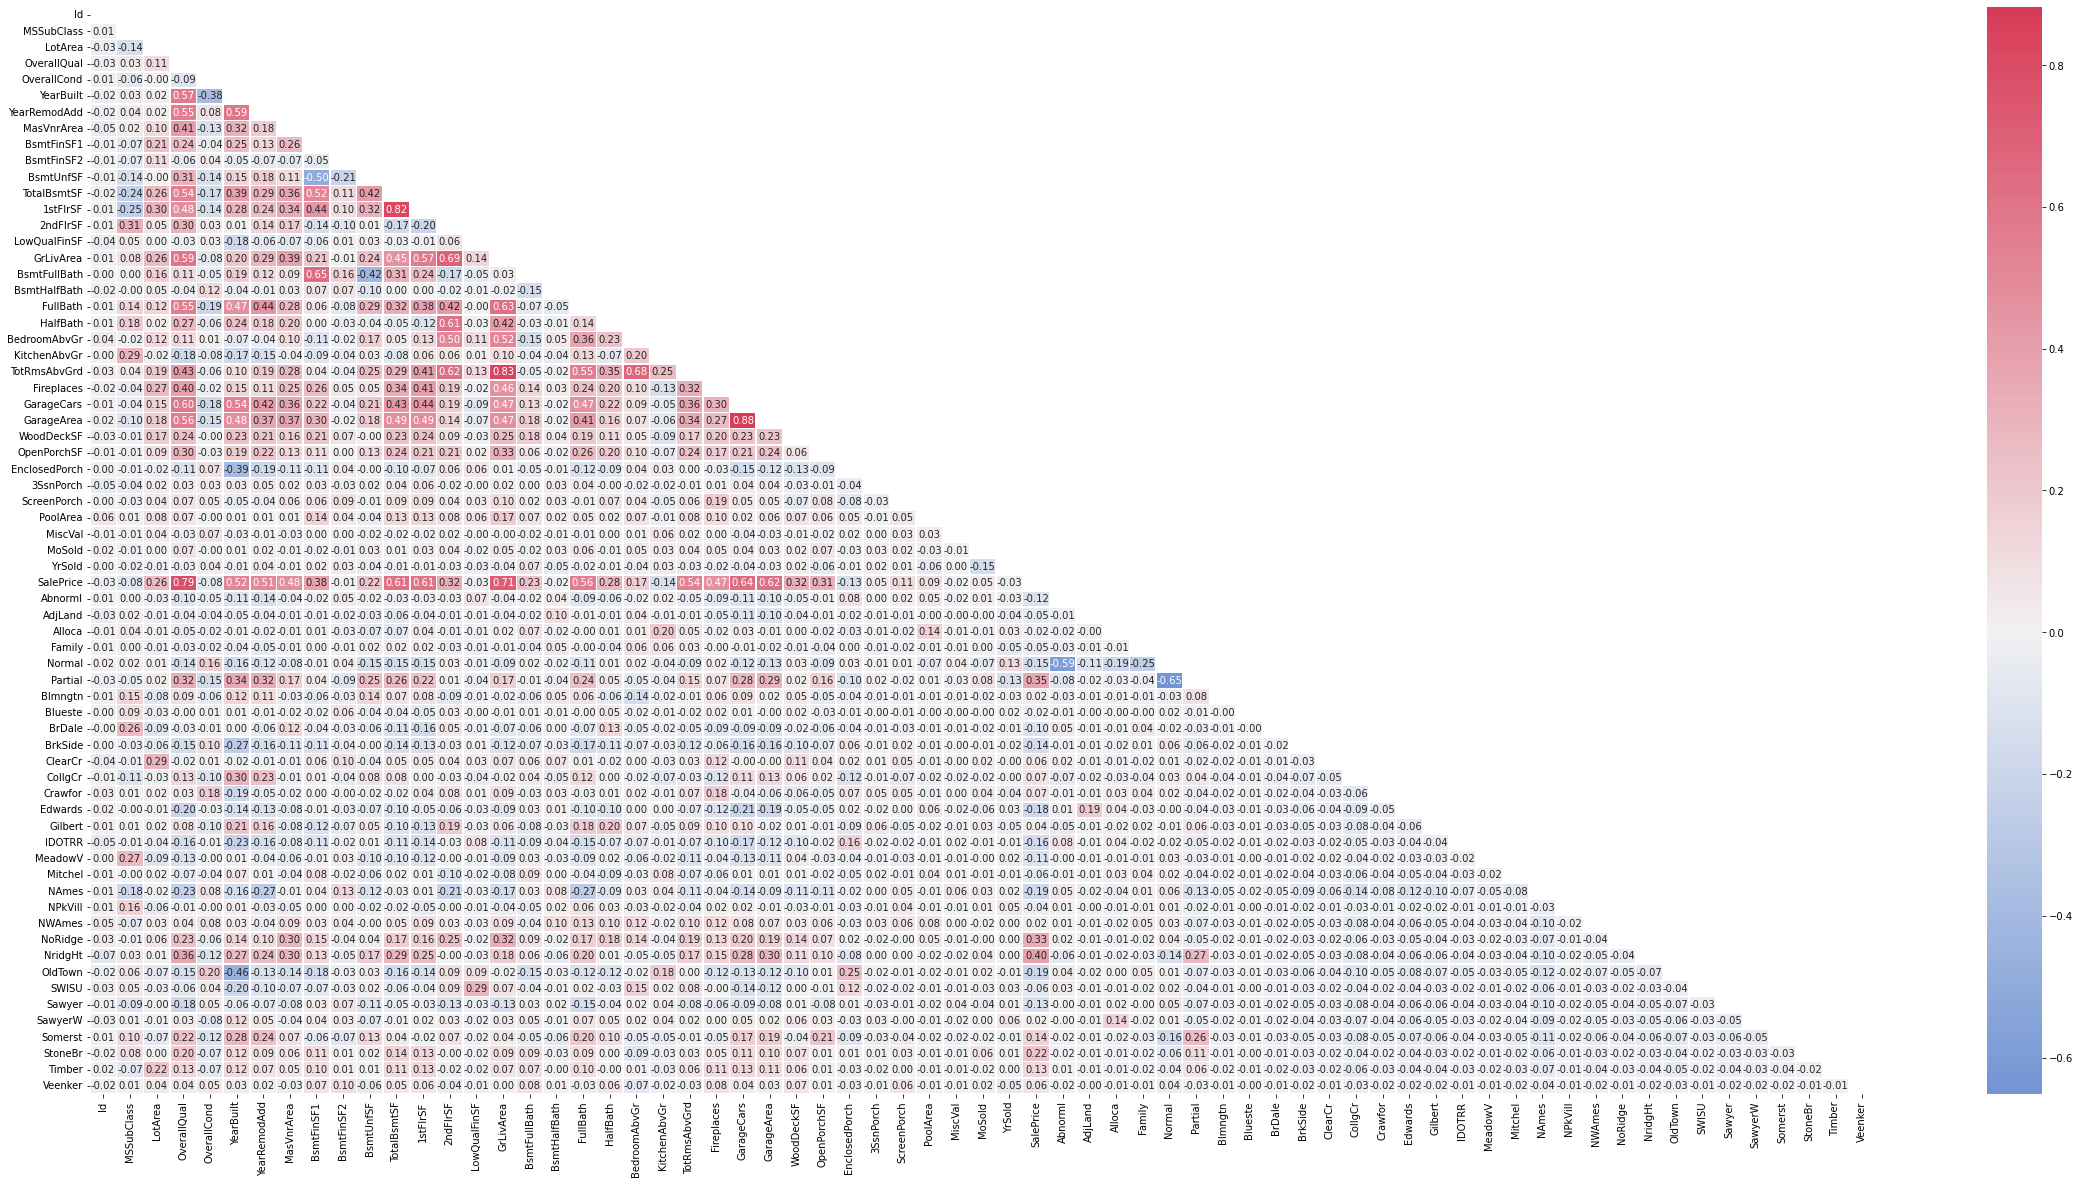

In [38]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(255, 6, as_cmap=True)

figure = sns.heatmap(df.corr(), mask=mask, cmap=cmap,
                     center=0, linewidths=0.5,
                     annot=True, fmt='.2f'
                     );

**Visualmente es complicado distinguir las variables de mayor correlación, aunque de primer instancia podemos observar alguna dependencia entre el precio y las variables "OverallQual", "GrLivArea", "GarageCars", "GarageArea", entre otras.** 

**Ahora de manera numérica comprobaremos lo anterior**

In [39]:
corr_matrix = df.corr()

In [40]:
corr_matrix

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,1.000000,0.011687,-0.032844,-0.032883,0.013029,-0.015129,-0.024224,-0.050298,-0.007242,-0.005516,-0.008274,-0.017912,0.008684,0.007333,-0.044125,0.008356,0.001030,-0.019809,0.005673,0.005652,0.041511,0.004806,0.029185,-0.017536,0.014997,0.015399,-0.028146,-0.006176,0.004554,-0.046541,0.001769,0.057268,-0.006114,0.018962,0.002776,-0.025343,0.007464,-0.034837,-0.005518,0.005065,0.018706,-0.026440,0.011385,0.004286,-0.002661,0.002371,-0.041521,-0.005362,0.034331,0.021347,0.014642,-0.050713,0.000820,0.012973,0.008298,0.009666,0.050528,0.034532,-0.071572,-0.024538,0.034963,-0.007676,-0.033541,0.012771,-0.018923,0.022233,-0.022975
MSSubClass,0.011687,1.000000,-0.138054,0.034491,-0.061330,0.028397,0.041047,0.022936,-0.069575,-0.066137,-0.138922,-0.236906,-0.250050,0.308104,0.046413,0.076930,0.003807,-0.002633,0.136306,0.176165,-0.021651,0.286572,0.042406,-0.044466,-0.039043,-0.098141,-0.012634,-0.005462,-0.010571,-0.044049,-0.026414,0.008214,-0.007805,-0.013840,-0.021529,-0.082813,0.004679,0.016206,0.038200,0.000840,0.023108,-0.051485,0.147012,0.090423,0.257000,-0.034736,-0.014740,-0.109944,0.009151,-0.000958,0.007071,-0.012609,0.274078,-0.001397,-0.183845,0.159110,-0.067189,-0.013252,0.031553,0.063761,0.047693,-0.089468,0.009302,0.101857,0.082092,-0.067685,0.010051
LotArea,-0.032844,-0.138054,1.000000,0.106324,-0.002269,0.015639,0.015126,0.104160,0.213063,0.111686,-0.004227,0.258409,0.295919,0.052935,0.004904,0.261159,0.157702,0.048377,0.122457,0.016290,0.117778,-0.024697,0.187990,0.269643,0.154739,0.180778,0.173167,0.086301,-0.023094,0.020574,0.043511,0.077888,0.038226,0.003203,-0.012977,0.264674,-0.028926,-0.013183,-0.008155,-0.010689,0.008997,0.023660,-0.077485,-0.033034,-0.092028,-0.064278,0.286013,-0.030041,0.016741,-0.007861,0.021882,-0.038833,-0.089193,0.020904,-0.015753,-0.057256,0.030559,0.063357,0.008029,-0.066915,-0.031542,-0.001114,-0.011974,-0.065899,0.002182,0.215986,0.044610
OverallQual,-0.032883,0.034491,0.106324,1.000000,-0.090628,0.571111,0.549573,0.411876,0.236823,-0.058039,0.309602,0.537122,0.476936,0.298543,-0.029998,0.594417,0.108505,-0.039207,0.552266,0.271466,0.105900,-0.184642,0.430549,0.400398,0.599734,0.560543,0.240652,0.303482,-0.112950,0.031029,0.066403,0.065743,-0.031129,0.068760,-0.025186,0.789997,-0.102714,-0.041603,-0.046149,-0.025075,-0.139633,0.319405,0.085406,-0.002501,-0.030996,-0.153817,-0.020322,0.131730,0.025579,-0.199515,0.081294,-0.156482,-0.127885,-0.067825,-0.227313,-0.005318,0.039289,0.226391,0.364889,-0.148026,-0.062592,-0.178893,0.032110,0.224046,0.198138,0.126430,0.040135
OverallCond,0.013029,-0.061330,-0.002269,-0.090628,1.000000,-0.376763,0.075121,-0.128101,-0.041927,0.039333,-0.136934,-0.167230,-0.138814,0.027473,0.025140,-0.076541,-0.051567,0.117290,-0.190396,-0.061434,0.014274,-0.081254,-0.055964,-0.020120,-0.184866,-0.151062,-0.004530,-0.031172,0.074731,0.025163,0.054016,-0.002229,0.068642,-0.004034,0.043433,-0.076294,-0.047439,-0.039166,-0.016926,-0.024342,0.157761,-0.150954,-0.056654,0.014045,-0.013442,0.102420,0.012522,-0.102592,0.183425,-0.034022,-0.096567,-0.005618,-0.004870,-0.035580,0.081550,-0.001678,0.075678,-0.055101,-0.122329,0.202269,0.040538,0.048234,-0.077728,-0.122833,-0.068895,-0.065945,0.054454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [41]:
#Ordenamos de mayor a menor correlación con la columna de precio
corr_matrix.loc['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.789997
GrLivArea      0.710080
GarageCars     0.639686
GarageArea     0.622492
                 ...   
Normal        -0.150180
IDOTRR        -0.164220
Edwards       -0.179788
NAmes         -0.187847
OldTown       -0.192022
Name: SalePrice, Length: 67, dtype: float64

In [42]:
corr_matrix.loc['SalePrice'].sort_values(ascending=False).head(40)

SalePrice       1.000000
OverallQual     0.789997
GrLivArea       0.710080
GarageCars      0.639686
GarageArea      0.622492
TotalBsmtSF     0.612971
1stFlrSF        0.606849
FullBath        0.562491
TotRmsAbvGrd    0.536311
YearBuilt       0.522896
YearRemodAdd    0.507158
MasVnrArea      0.477493
Fireplaces      0.468930
NridgHt         0.396442
BsmtFinSF1      0.383977
Partial         0.349383
NoRidge         0.332674
WoodDeckSF      0.324650
2ndFlrSF        0.322710
OpenPorchSF     0.311268
HalfBath        0.282040
LotArea         0.264674
BsmtFullBath    0.225027
StoneBr         0.216905
BsmtUnfSF       0.215740
BedroomAbvGr    0.171934
Somerst         0.142373
Timber          0.127477
ScreenPorch     0.113044
PoolArea        0.093109
CollgCr         0.072910
Crawfor         0.071980
Veenker         0.064110
ClearCr         0.056527
3SsnPorch       0.045247
MoSold          0.045136
Gilbert         0.035882
NWAmes          0.024486
Blmngtn         0.019577
SawyerW         0.015362


**Sabiendo ahora que las características con mayor correlación son: "OverallQual", "GrLivArea" y "GrLivArea", buscaremos realizar un modelo de regresión lineal para predecir el valor de las propiedades**

##Regresión lineal

**De manera gráfica**

In [43]:
df_lr = df.copy()

In [44]:
df_lr = df_lr[['OverallQual', 'SalePrice']]
df_lr.head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


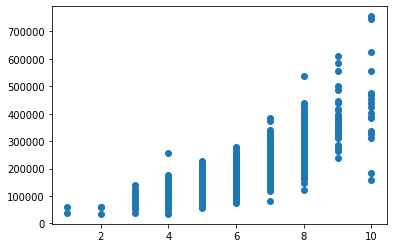

In [45]:
plt.scatter(df_lr.OverallQual, df_lr.SalePrice )

In [46]:
slope, intercept, rvale, pvalue, stderr = linregress(df_lr.OverallQual, df_lr.SalePrice)

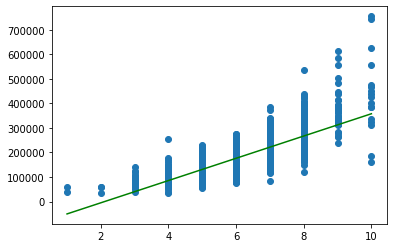

In [47]:
# y = slope * X + b
plt.scatter(df_lr.OverallQual, df_lr.SalePrice)

x_2 = [df_lr.OverallQual.min(),df_lr.OverallQual.max()]
y_2 = [slope*df_lr.OverallQual.min() + intercept, slope*df_lr.OverallQual.max() + intercept]
plt.plot(x_2, y_2, color='g')

**En el gráfico superior podemos apreciar una linea de tendencia que muestra una forma sencilla de predicción, sin embargo existe una dispersion importante entre brackets de calificación lo que hará qu nuestro modelo tenga poca precisión**

### OLS

Para confirmar de manera numérica la regresión lineal realizaremos el método OLS

####1 Variable

In [48]:
ols_model(['OverallQual'],df,'SalePrice')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2407.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.26e-310
Time:                        04:33:28   Log-Likelihood:                -17729.
No. Observations:                1452   AIC:                         3.546e+04
Df Residuals:                    1450   BIC:                         3.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.567e+04   5773.897    -16.570      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,OverallQual,Predicciones,Real
0,1.0,7,221744.633097,208500
1,1.0,6,176399.048240,181500
2,1.0,7,221744.633097,223500
3,1.0,7,221744.633097,140000
4,1.0,8,267090.217954,250000
...,...,...,...,...
1455,1.0,6,176399.048240,175000
1456,1.0,6,176399.048240,210000
1457,1.0,7,221744.633097,266500
1458,1.0,5,131053.463383,142125


**El resultado nos muestra una r2 de 0.624 lo que nos indica que logramos capturar un 62.4% aproximado de la varicación de la data. Debemos continuar probando con más variables para ver si el modelo mejora.**

####3 Variables

In [49]:
ols_model(['OverallQual','GrLivArea','GarageCars'],df,'SalePrice')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1364.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:33:51   Log-Likelihood:                -17466.
No. Observations:                1452   AIC:                         3.494e+04
Df Residuals:                    1448   BIC:                         3.496e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.802e+04   4851.279    -20.205      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,OverallQual,GrLivArea,GarageCars,Predicciones,Real
0,1.0,7,1710,2,219999.095833,208500
1,1.0,6,1262,2,170271.273960,181500
2,1.0,7,1786,2,223868.607208,223500
3,1.0,7,1717,3,241620.581223,140000
4,1.0,8,2198,3,293028.585667,250000
...,...,...,...,...,...,...
1455,1.0,6,1647,2,189873.403952,175000
1456,1.0,6,2073,2,211563.033502,210000
1457,1.0,7,2340,1,230810.225522,266500
1458,1.0,5,1078,1,112719.829627,142125


**Con las tres variables de mayor correlación hemos pasado de una r2 de 0.624  a 0.739 lo que nos indica que logramos mejorar la capacidad de predicción. Debemos continuar probando con más variables para ver si el modelo mejora.**

####13 Variables

In [50]:
ols_model(['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','NridgHt'],df,'SalePrice')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     414.6
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:34:16   Log-Likelihood:                -17309.
No. Observations:                1452   AIC:                         3.465e+04
Df Residuals:                    1438   BIC:                         3.472e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.189e+06   1.25e+05     -9.478   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,NridgHt,Predicciones,Real
0,1.0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,0,207520.905875,208500
1,1.0,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,0,169331.400670,181500
2,1.0,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,0,222103.317704,223500
3,1.0,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,0,195104.160658,140000
4,1.0,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,0,279593.414378,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,6,1647,2,460,953,953,2,7,1999,2000,0.0,1,0,192680.322139,175000
1456,1.0,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,2,0,238502.218549,210000
1457,1.0,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,2,0,233813.601491,266500
1458,1.0,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,0,0,123147.782831,142125


**Con 13 variables es posible tener un modelo que presenta una r2 de casi 0.79,lo cual mejora la predicción anterior**

####18 Variables

**Finalmente con 18 variables podemos notar que cada vez es menor la mejora de los parámetros estadísticos por lo que decidimos detener el proceso iterativo y propondremos este modelo con una r2 de 0.81 como el mejor para la estimación del precio de las propiedades de este dataset**

In [52]:
ols_model(['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','NridgHt','Partial','NoRidge','StoneBr','NAmes'],df,'SalePrice')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     354.7
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:39:35   Log-Likelihood:                -17242.
No. Observations:                1452   AIC:                         3.452e+04
Df Residuals:                    1434   BIC:                         3.462e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.069e+06   1.23e+05     -8.706   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,NridgHt,Partial,NoRidge,StoneBr,NAmes,Predicciones,Real
0,1.0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,0,0,0,0,0,199010.776568,208500
1,1.0,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,0,0,0,0,0,168230.370397,181500
2,1.0,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,0,0,0,0,0,212880.895611,223500
3,1.0,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,0,0,0,0,0,191276.792583,140000
4,1.0,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,0,0,1,0,0,319901.665041,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,6,1647,2,460,953,953,2,7,1999,2000,0.0,1,0,0,0,0,0,188878.016557,175000
1456,1.0,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,2,0,0,0,0,0,232357.652959,210000
1457,1.0,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,2,0,0,0,0,0,229925.966909,266500
1458,1.0,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,0,0,0,0,0,1,122618.998524,142125


## Conclusiones

A través del uso de análisis estadísticos como la correlación y metódos de regresión lineal hemos logrado diseñar un modelo que permite capturar un 80% de la variación de la data y predecir el valor del las propiedades, si bien aún existen muchas otras herramientos que podrían ayudarnos a comprender mejor la relación entre las variables que impactan el precio de una casa, de momento podemos concluir este proyecto y pensar en posteriormente aplicar métodologías de Machine Learning para la mejora en la precisión. 